## Rapport : Résolution de Problèmes / Machine Learning

#### IMT Mines Alès 2022
##### INFRES 13 
- **Quentin BIALOTA**
- **Tom L'HERMENIER**

![Logo IMT](https://www.fondation-mines-telecom.org/wp-content/uploads/2018/02/imt_mines_ales-300x158.jpg)

---

[//]: <> (Generally define your task)
[//]: <> (Analyse the corresponding dataset.)
[//]: <> (Define the problem as a Machine Learning problem.)
[//]: <> (Define the methodology and protocol you will use to tackle the problem.)
[//]: <> (Implement various approaches that are suited to this problem.)
[//]: <> (Discuss the results you have obtained.)
[//]: <> (Eventually recommend your final solution motivating it.)

Dans le cadre de du cours de **Résolution de Problèmes - Machine Learning** à l'IMT Mines Alès, nous avons réalisé un projet de notre choix, visant à résoudre un problème de machine learning, le tout en évaluant et comparant différents modèles pour la résolution du problème.

Dans ce projet, nous avons choisi de traiter une problématique visant à prédire un nombre de FPS (Frame Per Second / Image par Seconde), en fonction du jeu auquel on joue, et des différentes caractéristiques de l'ordinateur sur lequel on fait tourner le programme (Nom du processeur, nombre de coeurs, nombre de threads, nom de la carte graphique, ...)

---

Afin de traiter ce problème, nous avons décidé d'utiliser un dataset déjà existant et disponible sur le site OpenML. Ce dataset nommé `fps-in-video-game` est accessible au lien suivant : https://www.openml.org/d/42737.


##### Imports globaux
Avante toute chose, veuillez lancer la cellule suivante pour importer les librairies et outils utilisés dans ce rapport.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

from IPython.display import display

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from math import trunc
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

---

##### Import du dataset

Via la cellule suivante, vous pouvez importer le dataset depuis le site d'OpenML.

In [2]:
### Import du dataset depuis OpenML (lien du dataset : https://www.openml.org/d/42737)

dataset = sklearn.datasets.fetch_openml(name="fps-in-video-games")

### Stockage du dataset dans une dataframe

dataset_df = pd.DataFrame(data=np.c_[dataset.data, dataset.target], columns=dataset.feature_names+['target'])

### Informations sur le dataset

print("Informations sur le dataset : \n",dataset["DESCR"])

Informations sur le dataset : 
 **Author**: Sven Peeters  
**Source**: userbenchmark.com, fpsbenchmark.com, techpowerup.com - June 2020  
**Please cite**: TBA

# Achieved Frames per Second (FPS) in video games

This dataset contains FPS measurement of video games executed on computers. Each row of the dataset describes the outcome of FPS measurement (outcome is attribute FPS) for a video game executed on a computer. A computer is characterized by the CPU and the GPU. For both the name is resolved to technical specifications (features starting with Cpu and Gpu). The technical specification of CPU and GPU are technical specification that describe the factory state of the respective component. The game is characterized by the name, the displayed resolution, and the quality setting that was adjusted during the measurement (features starting with Game). In the following there is a short descriptions of the data sources and a description for each feature in the dataset.

## Source of Data

T

---

##### Structure du dataset :

Le dataset utilisé contient au total 44 caractéristiques (features) labélisées avec le nombre de FPS observé dans chaque cas, et au total ce dataset contient 425 833 observations.

Le problème principal de ces données, et qu'il y a beaucoup de valeurs non renseignées, voir même des colonnes entièrement vides (remplies de NaN). C'est pas exemple le cas `GpuNumberOfExecutionUnits` qui n'est pas renseignée pour quasiment toutes les observations.

Afin de voir au mieux ces données non renseignées, voici un récapitulatif (dans la cellule suivante) du nombre total de "trous" dans le dataset (valeur à NaN), ainsi que le nombre de "trous" par caractéristique.

Pour finir au niveau de la structure, nous avons pu remarquer beaucoup de duplicatas sur les inputs (valeurs de caractéristiques), avec des targets (valeurs cibles) différentes. De ce fait, on peut considérer d'or et déjà que ce dataset ne contient pas toutes les informations nécéssaires pour une meilleure prédiction du nombre de FPS. On peut par exemple penser à la RAM (mémoire vive) qui peut influer sur les FPS.

Nombre total de Nan dans le dataset :  1299988
Nombre de Nan pour chaque caracteristique : 
 [['CpuName' 0]
 ['CpuNumberOfCores' 0]
 ['CpuNumberOfThreads' 0]
 ['CpuBaseClock' 0]
 ['CpuCacheL1' 0]
 ['CpuCacheL2' 0]
 ['CpuCacheL3' 5055]
 ['CpuDieSize' 202534]
 ['CpuFrequency' 0]
 ['CpuMultiplier' 0]
 ['CpuMultiplierUnlocked' 0]
 ['CpuProcessSize' 0]
 ['CpuTDP' 0]
 ['CpuNumberOfTransistors' 226039]
 ['CpuTurboClock' 0]
 ['GpuName' 0]
 ['GpuArchitecture' 0]
 ['GpuBandwidth' 15441]
 ['GpuBaseClock' 0]
 ['GpuBoostClock' 0]
 ['GpuBus nterface' 0]
 ['GpuNumberOfComputeUnits' 357107]
 ['GpuDieSize' 11196]
 ['GpuDirectX' 0]
 ['GpuNumberOfExecutionUnits' 412935]
 ['GpuFP32Performance' 56]
 ['GpuMemoryBus' 15441]
 ['GpuMemorySize' 15441]
 ['GpuMemoryType' 15441]
 ['GpuOpenCL' 177]
 ['GpuOpenGL' 0]
 ['GpuPixelRate' 0]
 ['GpuProcessSize' 0]
 ['GpuNumberOfROPs' 0]
 ['GpuShaderModel' 5]
 ['GpuNumberOfShadingUnits' 56]
 ['GpuNumberOfTMUs' 0]
 ['GpuTextureRate' 0]
 ['GpuNumberOfTransistors' 11539]
 ['Gp

<AxesSubplot:title={'center':'Nombre de valeurs nulles par caractéristique'}, xlabel='Caractéristique (numero)', ylabel='Nombre de valeurs nulles'>

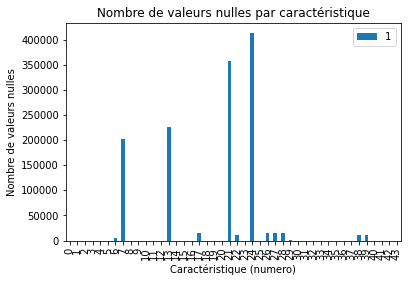

In [3]:
### Compte le nombre de NaN dans le dataset

bc_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

tab = []
j = 0

for feature in bc_df.columns:
    tab.append(bc_df[feature].isna().sum())

print("Nombre total de Nan dans le dataset : ",bc_df.isna().sum().sum())
print("Nombre de Nan pour chaque caracteristique : \n",np.c_[bc_df.columns,tab])

print ("Sous forme de graphe :")
affiche = pd.DataFrame(np.c_[bc_df.columns,tab])
affiche.plot(kind='bar', title='Nombre de valeurs nulles par caractéristique', xlabel='Caractéristique (numero)', ylabel='Nombre de valeurs nulles')

##### Tri du dataset

Afin de pouvoir utiliser notre dataset, il nous faut le trier. D'une part car les valeurs NaN vont poser problème, et d'autre part car il y a un trop grand nombre d'observations pour traiter le problème dans des temps raisonnables sur nos ordinateurs (environ un demi million d'observations).

Pour trier donc ce dataset, se proposait à nous deux méthodologies principales (avec plusieurs variantes minimes à chaque fois, mais nous ne le détaillerons pas ici) :

- Supprimer toutes les colonnes du dataset contenant des valeurs nulles (NaN), puis choisir dans les colonnes restantes, celles qui sont pertinentes. Mais cela nous enlève beaucoup de caractéristiques, et ça pourrait rendre les prédictions moins bonnes. De plus ça garde l'ensemble des observations, il faudrait donc trier par dessus les quelles garder.
- Supprimer la colonne `GpuNumberOfExecutionUnits` (car c'est une colonne contenant que des valeurs nulles) ainsi que les colonnes `GpuNumberOfComputeUnits , CpuNumberOfTransistors , CpuDieSize , Dataset` (car ce sont des colonnes avec beaucoup de lignes nulles), puis supprimer toutes les lignes contenant des valeurs nulles (NaN) (sur le reste des caractéristiques non supprimées).

Une fois fait, dans les deux méthodes nous avons décidé de supprimer les doublons afin de réduire le nombre d'observations. Ce que l'on appelle doublon ou duplicatas, sont les observations où il y a les mêmes valeurs de caractéristiques, sans prendre en compte la target (le fps). Ce qui veut dire que l'on supprime à chaque fois dans le dataset des observations ayant les mêmes valeurs de caractéristiques, mais des targets différents, le tout en gardant à chaque fois la première observation dans la liste. 

Comme dit plus haut, on peut comprendre via ces duplicatas que les caractéristiques ne sont pas complète, ce qui jouera beaucoup sur les performances de prédiction.

##### Méthode 1 (non retenue) : Suppression des colonnes contennants des valeurs nulles (NaN)

Dans le cas de la méthode 1, voici la liste des caractéristiques / colonnes que nous devons supprimer :
- `CpuCacheL3`
- `CpuDieSize`
- `CpuNumberOfTransistors`
- `GpuBandwidth`
- `GpuNumberOfComputeUnits`
- `GpuDieSize`
- `GpuNumberOfExecutionUnits`
- `GpuFP32Performance`
- `GpuMemoryBus`
- `GpuMemorySize`
- `GpuMemoryType`
- `GpuOpenCL`
- `GpuShaderModel`
- `GpuNumberOfShadingUnits`
- `GpuNumberOfTransistors`
- `GpuVulkan`

In [4]:
### Avec les observations "dupliquées" (mêmes valeurs de caractéristiques, mais fps différents)

dataset_df_method1 = dataset_df.dropna(axis='columns')

print('Liste des caractéristiques :',dataset_df_method1.columns)
print('Nombre de colonnes x Nombre de lignes (Avec duplication): ',
    str(len(dataset_df_method1.index)) + ' x '+ str(len(dataset_df_method1.columns)))

### Sans les observations "dupliquées" (mêmes valeurs de caractéristiques, mais fps différents)

dataset_df_method1_noduplicates = dataset_df_method1.drop_duplicates(subset=dataset_df_method1.columns.difference(['target']))

print('Nombre de colonnes x Nombre de lignes (Sans duplication): ',
    str(len(dataset_df_method1_noduplicates.index)) + ' x '+ str(len(dataset_df_method1_noduplicates.columns)))

Liste des caractéristiques : Index(['CpuName', 'CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock',
       'CpuCacheL1', 'CpuCacheL2', 'CpuFrequency', 'CpuMultiplier',
       'CpuMultiplierUnlocked', 'CpuProcessSize', 'CpuTDP', 'CpuTurboClock',
       'GpuName', 'GpuArchitecture', 'GpuBaseClock', 'GpuBoostClock',
       'GpuBus nterface', 'GpuDirectX', 'GpuOpenGL', 'GpuPixelRate',
       'GpuProcessSize', 'GpuNumberOfROPs', 'GpuNumberOfTMUs',
       'GpuTextureRate', 'GameName', 'GameResolution', 'GameSetting',
       'Dataset', 'target'],
      dtype='object')
Nombre de colonnes x Nombre de lignes (Avec duplication):  425833 x 29
Nombre de colonnes x Nombre de lignes (Sans duplication):  107078 x 29


Après avoir fait quelques tests sur un modèle linéaire via (LinearRegression) ces données la (que nous ne détaillerons pas ici car il s'agit des mêmes tests que nous feront avec l'autre méthode), nous obtennons globalement les mêmes résultats (un peu moins bon) qu'avec l'autre méthode. Cependant, cette première méthode créé beaucoup plus de problèmes quant au choix du dataset (quelles observations enlever ?)

De plus, même en ayant supprimer les doublons / duplicatas, on garde un très grand nombre d'observations.

---

##### Méthode 2 : Supression de certaines colonnes, et suppression des observations avec une valeur nulle (minimum)

Comme précisé plus tôt, cette méthode consiste à supprimer les colonnes suivantes :
- `GpuNumberOfExecutionUnits` - 412935 valeurs nulles
- `GpuNumberOfComputeUnits` - 357107 valeurs nulles
- `CpuNumberOfTransistors`- 226039 valeurs nulles
- `CpuDieSize` - 202534 valeurs nulles
- `Dataset` - Caractéristique inutile qui spécifie simplement de quel benchmark (logiciel de test) vient l'observation

Via le code suivant, on enlève donc ces caractéristiques du dataset, puis on supprime toutes les observations contenant des valeurs nulles. Afin de réduire encore le nombre d'observations, et d'éviter les problèmes lors des prédictions, nous supprimons en plus les observations dupliquées (mêmes valeurs de caractéristiques, mais targets possiblement différentes)

In [3]:
### Supression des colonnes, et supression des valeurs nulles (les lignes avec des valeurs nulles)

dataset_df_reduced_rows = dataset_df.drop(
    columns=['GpuNumberOfExecutionUnits', 'GpuNumberOfComputeUnits','CpuNumberOfTransistors', 'CpuDieSize','Dataset']).dropna()

print('Liste des caractéristiques :',dataset_df_reduced_rows.columns)
print('Nombre de colonnes x Nombre de lignes (Avec duplication): ',
    str(len(dataset_df_reduced_rows.index)) + ' x '+ str(len(dataset_df_reduced_rows.columns)))

### Supression des observations dupliquées (voir plus haut pour explication)
### Et retri des index (car les index ne changent pas si on supprime des lignes)

dataset_df_reduced_rows = dataset_df_reduced_rows.drop_duplicates(subset=dataset_df_reduced_rows.columns.difference(['target'])
    ).reset_index().drop(columns=['index'])

print('Nombre de colonnes x Nombre de lignes (Sans duplication): ',
    str(len(dataset_df_reduced_rows.index)) + ' x '+ str(len(dataset_df_reduced_rows.columns)))

Liste des caractéristiques : Index(['CpuName', 'CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock',
       'CpuCacheL1', 'CpuCacheL2', 'CpuCacheL3', 'CpuFrequency',
       'CpuMultiplier', 'CpuMultiplierUnlocked', 'CpuProcessSize', 'CpuTDP',
       'CpuTurboClock', 'GpuName', 'GpuArchitecture', 'GpuBandwidth',
       'GpuBaseClock', 'GpuBoostClock', 'GpuBus nterface', 'GpuDieSize',
       'GpuDirectX', 'GpuFP32Performance', 'GpuMemoryBus', 'GpuMemorySize',
       'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuPixelRate',
       'GpuProcessSize', 'GpuNumberOfROPs', 'GpuShaderModel',
       'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate',
       'GpuNumberOfTransistors', 'GpuVulkan', 'GameName', 'GameResolution',
       'GameSetting', 'target'],
      dtype='object')
Nombre de colonnes x Nombre de lignes (Avec duplication):  396028 x 40
Nombre de colonnes x Nombre de lignes (Sans duplication):  93903 x 40


Dans la suite du projet, nous utiliserons cette méthode, sans la duplication des observations.

---

Avant d'effectuer des tests de modèles sur ce dataset, voici quelques graphiques pour mieux cerner les données contennue dans ce dataset.

1. Premièrement, il faut savoir que ce dataset est fait pour plusieurs jeux. Et le nombre d'observations par jeu est assez inégal (voir premier graphique). Cette hétérogénéité des données pourrait causer des baisses de performances au niveau des modèles.
2. Ensuite nous verrons une Correlation Heatmap (carte de chaleur de corrélation) afin de voir rapidement les possibles corrélations entre les caractéristiques du dataset.

##### Graphique relatif aux jeux du dataset

Nombre de jeux :  30
Nombre d'observation par jeux : 
 GameName
aWayOut                         1026
airMechStrike                   1026
apexLegends                     4760
arkSurvivalEvolved              1938
battlefield1                    4845
battlefield4                    3570
battletech                      1026
callOfDutyBlackOps4             2331
callOfDutyWW2                   1026
counterStrikeGlobalOffensive    9451
destiny2                        1026
dota2                           3690
farCry5                         1026
fortnite                        8223
frostpunk                       1026
grandTheftAuto5                 7715
leagueOfLegends                 6166
minecraft                       2894
overwatch                       7753
pathOfExile                     1026
playerUnknownsBattlegrounds     8736
radicalHeights                  1026
rainbowSixSiege                 1026
rocketLeague                    1588
rust                            2130
seaOfThieve

<AxesSubplot:title={'center':"Nombre d'observations par jeu"}, xlabel='Jeu', ylabel="Nombre d'observations">

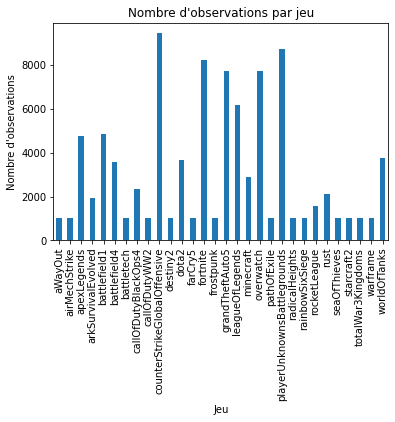

In [4]:
dataset_df_reduced_rows_pivot = dataset_df_reduced_rows.pivot_table(columns=['GameName'], aggfunc='size')

print("Nombre de jeux : ",len(dataset_df_reduced_rows_pivot.index))
print("Nombre d'observation par jeux : \n",dataset_df_reduced_rows_pivot)

dataset_df_reduced_rows_pivot.plot(kind='bar', title='Nombre d\'observations par jeu', xlabel='Jeu', ylabel='Nombre d\'observations')

##### Correlation Heatmap

Informations pour la lecture du graphique :

- **Si la valeur est 1, c'est un correlation positive entre les deux variables.** Quand une variable augmente, l'autre variable augmente aussi.
- **Si la valeur est -1, c'est un correlation négative entre les deux variables.** Quand une variable augmente, l'autre variable diminue.
- **Si la valeur est 0, il n'y a pas de correlations entre les deux variables.** Quand une variable change d'une manière quelconque, il n'y a aucun impact sur l'autre variable.

*(explications issues du site : https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/)*

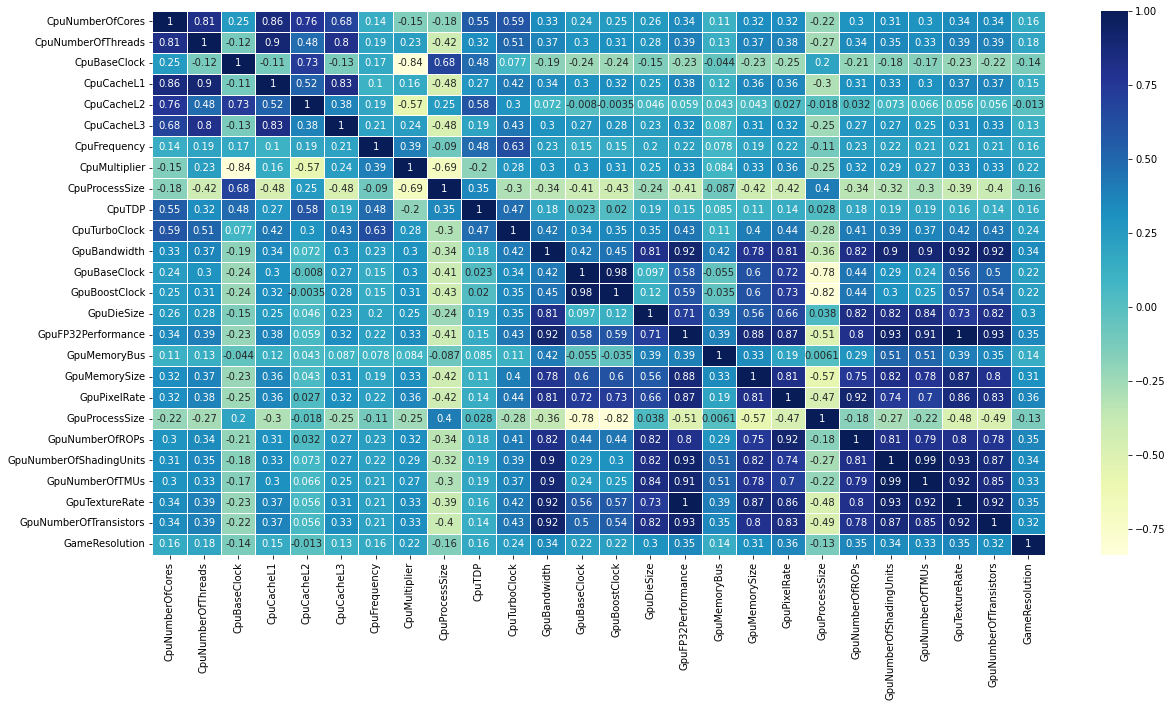

In [5]:
### Création d'un dataset temporaire pour l'affichage (dataset sans le target)

dataset_temp = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

### Supression des colonnes, et supression des valeurs nulles (les lignes avec des valeurs nulles)

dataset_temp = dataset_temp.drop(
    columns=['GpuNumberOfExecutionUnits', 'GpuNumberOfComputeUnits','CpuNumberOfTransistors', 'CpuDieSize','Dataset']).dropna()

dataset_temp = dataset_temp.drop_duplicates(subset=dataset_temp.columns.difference(['target'])).reset_index().drop(columns=['index'])

%matplotlib inline

corr_matrix=dataset_temp.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap="YlGnBu")

Comme on peut le voir sur le graphe ci-dessus, plus on se rapproche de la couleur bleu foncée, plus on a une corrélation positive, et plus on se rapproche de la couleur blanche, plus on a une corrélation négative. Et on peut remarquer plusieurs caractéristiques assez corrélées comme le nombre de coeurs d'un CPU (`CpuNumberOfCore`) et le Cache L1 (`CPUCacheL1`).

---

##### Présence de valeurs de caractéristiques de type "string" (chaine de caractères)

Autre point concernant le dataset, certaines caractéristiques contiennent des valeurs de type String. Par exemple la caractéristique `CpuName` (qui contient le nom du CPU utilisé dans l'observation) est une chaine de caractères.

Afin de pouvoir traiter ces données de types string, nous allons transformer chaque chaine de caractère en un chiffre. Et afin de retrouver quelle chaine de caractère correspond un chiffre (int), nous stockons les correspondances dans un dictionnaire.

In [4]:
### Algorithme parcourant le dataset et remplaçant les valeurs de type string, par un int 
### (le tout en stockant les correspondances dans un dictionnaire)

dataset_reduced_without_string = dataset_df_reduced_rows.copy()
dict_global = {}
for name, values in dataset_df_reduced_rows.iteritems():
    compt = 0
    tab = {}
    for i in range(values.size):
        if isinstance(dataset_reduced_without_string[name][i], str):
            if dataset_reduced_without_string[name][i] not in tab:
                tab[dataset_reduced_without_string[name][i]] = compt
                dataset_reduced_without_string[name][i] = compt
                compt += 1
            else:
                dataset_reduced_without_string[name][i] = tab[dataset_reduced_without_string[name][i]]
        else:
            break
    dict_global[name] = tab

In [13]:
### Affichage du dictionnaire (Très gros)

# UNCOMMENT
# print(dict_global)

### Affichage d'une des caractéristiques du dictionnaire (pour tester)

print(dict_global['GameName'])

{'counterStrikeGlobalOffensive': 0, 'grandTheftAuto5': 1, 'worldOfTanks': 2, 'rust': 3, 'leagueOfLegends': 4, 'arkSurvivalEvolved': 5, 'apexLegends': 6, 'minecraft': 7, 'playerUnknownsBattlegrounds': 8, 'battlefield1': 9, 'fortnite': 10, 'rocketLeague': 11, 'callOfDutyBlackOps4': 12, 'dota2': 13, 'overwatch': 14, 'battlefield4': 15, 'callOfDutyWW2': 16, 'pathOfExile': 17, 'destiny2': 18, 'radicalHeights': 19, 'seaOfThieves': 20, 'frostpunk': 21, 'totalWar3Kingdoms': 22, 'warframe': 23, 'airMechStrike': 24, 'battletech': 25, 'farCry5': 26, 'starcraft2': 27, 'rainbowSixSiege': 28, 'aWayOut': 29}


#### Partie Machine Learning

Maintenant que nous avons vu le dataset que nous allons utiliser, nous pouvons expliquer avec plus de précision quel problème (en terme de machine learning) nous allons traiter.

##### Identification du problème technique et Méthodologie

Comme précisé à plusieurs reprises, notre but est de pouvoir prédire un nombre d'images par seconde (fps) sur un jeu, donc une valeur dans un domaine continue, via une liste de caractéristiques sur les composants de l'ordinateur faisant fonctionner le jeu en question. Etant donné que notre target (valeur cible), ici le fps, est dans un domaine continue, nous allons traiter d'une problématique de **régression**.

Afin de répondre à cette problématique de régression, nous allons tester plusieurs modèles : 
- Linear Regression
- Ridge
- MLPRegressor (réseaux de neuronnes)

Pour chaque modèle, nous calculerons plusieurs scores (r² score*) avec la méthode de la k-fold cross validation (k étapes, avec à chaque fois un jeu d'entrainement et de test différent et disjoint).
Puis nous comparerons les scores en eux mêmes et leurs moyenne (pour départager les différents modèles)

**(r² score : score basé sur la variation de la donnée par rapport à la moyenne et par rapport à notre prédicteur.*  
*Globalement correspond au pourcentage de variation autour de notre prédicteur, par rapport à la moyenne.*  
*Si j'ai un score de 0.8, alors mon prédicteur à 80% moins de variations autour de lui, qu'autour de la moyenne (mieux que la moyenne)*  
*Si j'ai un score de -0.8, alors mon prédicteur à 80% plus de variations autour de lui, qu'autour de la moyenne (pire que la moyenne)*  
*(Plus d'explications et formule avec cette vidéo : https://www.youtube.com/watch?v=2AQKmw14mHM))*  

---

*Note : Dans la suite du projet, nous traiterons aussi d'une problématique de classification en découpant la target (fps) en intervalles (ex : intervalle entre 10 et 20 fps).*

In [5]:
### Copie du dataset afin de ne pas le biaiser (opérations sur le dataset)

dataset_copy = dataset_reduced_without_string.copy()

### Mélange du dataset, car de base toutes les observations sur un même jeu sont à la suite
### (ex : 500 observation sur le jeu A, puis 500 sur le jeu B, ...) 
### Il faut donc mélanger pour éviter de biaiser la k-fold cross validation

dataset_copy = dataset_copy.sample(random_state=0, n=dataset_copy.shape[0])

### Stockage des valeurs de caractéristiques (X) et des targets associées à chaque observation (Y)

X = dataset_copy.drop(columns=['target'])
y = dataset_copy['target']

---

##### 1er modèle : Linear Regression

Le premier modèle que nous allons tester pour répondre à notre problématique de régression n'est autre que la régression linéaire (Linear Regression dans sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Pour ce modèle ci, nous montrerons d'abord comment entrainer un modèle sans k-fold cross validation. En découpant "à la main" le jeu de test et le jeu d'entrainement, et ne affichant les scores correspondants.  
Pour tout les autres modèles, nous ne feront pas cette étape, et utiliserons directement la fonction `cross_val_score` qui permet de faire de la k-fold cross validation automatiquement (découpage des jeux, entrainement).

In [6]:
### Découpage du dataset en train et test (25% de test par défaut)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Utilisation d'un StandardScaler car après de multiples tests il a tendance à améliorer les scores
### (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

scalar = StandardScaler()

### Application du StandardScaler sur le jeu de test et le jeu d'entrainement

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

### Entrainement du modèle avec le jeu d'entrainement

lr = LinearRegression().fit(X_train,y_train)

### Affichage du score

print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.20
Test set score: 0.20


In [7]:
X = dataset_copy.drop(columns=['target'])
y = dataset_copy['target']
scalar = StandardScaler()

### Le pipeline sert à appliquer des règles au cross_val_score.
### Ici on souhaite utiliser le modèle : LinearRegression.
### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

pipeline = Pipeline([('transformer', scalar), ('estimator', LinearRegression())])

### k-fold cross validation (k=20)

scores = cross_val_score(pipeline, X, y, cv=20)

### Affichage de scores

print("Score pour chaque étape (20 scores) : \n",scores)
print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Score pour chaque étape (20 scores) : 
 [0.18475617 0.20800448 0.18802065 0.19449724 0.19993379 0.20080621
 0.20085064 0.17379266 0.20009085 0.1950523  0.22705892 0.18947588
 0.20709001 0.18666864 0.20631745 0.21428214 0.20760923 0.20038641
 0.23694345 0.2027996 ]
0.20 de moyenne avec un écart-type de 0.01


---

##### 2e modèle : Ridge

Le deuxième modèle que nous allons tester pour répondre à notre problématique de régression se nomme Ridge (Ridge regressor dans sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [8]:
X = dataset_copy.drop(columns=['target'])
y = dataset_copy['target']
scalar = StandardScaler()

### Le pipeline sert à appliquer des règles au cross_val_score.
### Ici on souhaite utiliser le modèle : Ridge.
### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

pipeline = Pipeline([('transformer', scalar), ('estimator', Ridge(alpha=1.0))])

### k-fold cross validation (k=20)

scores = cross_val_score(pipeline, X, y, cv=20)

### Affichage de scores

print("Score pour chaque étape (20 scores) : \n",scores)
print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Score pour chaque étape (20 scores) : 
 [0.18477911 0.20795826 0.18804803 0.19440623 0.19982814 0.20081282
 0.20084956 0.17379741 0.20009827 0.19508225 0.22712316 0.18971305
 0.20694902 0.18671219 0.20629464 0.21431476 0.20764999 0.20032414
 0.23686801 0.20287011]
0.20 de moyenne avec un écart-type de 0.01


---

##### 3e modèle : MLPRegressor (Réseau de neuronnes)

Le troisième modèle que nous allons tester pour répondre à notre problématique de régression est un réseau de neuronnes (MLPRegressor dans sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [ ]:
X = dataset_copy.drop(columns=['target'])
y = dataset_copy['target']
scalar = StandardScaler()

### Le pipeline sert à appliquer des règles au cross_val_score.
### Ici on souhaite utiliser le modèle : MLPRegressor.
### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

pipeline = Pipeline([('transformer', scalar), ('estimator', MLPRegressor(random_state=1, max_iter=1000))])

### k-fold cross validation (k=5)

scores = cross_val_score(pipeline, X, y, cv=5)

### Affichage de scores

print("Score pour chaque étape (20 scores) : \n",scores)
print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

##### Résultats MLPRegressor :

Score pour chaque étape (5 scores) :  
 [0.34184137 0.38539981 0.40500464 0.38363435 0.3813366 ]  
0.38 de moyenne avec un écart-type de 0.02  

*(Affichage en markdown, car beaucoup de warning sur la non convergences)*  
*(K-fold cross validation avec k=5 car prend beaucoup de temps)*

Via ces différents modèles, on peut voir que les résultats ne sont pas excellents. On obtient sur le modèle de régression linéaire un score r² moyen de 0.2, et un score similaire avec le modèle Ridge.
Seul le modèle se basant sur le réseau neuronal a un score meilleure à 0.38 (meilleur résultats après plusieurs tests sur les hypers paramètres du MLPRegressor). On pourrait peut être améliorer ce score en augmentant le nombre maximum d'itérations, car avec 1000 le logiciel renvoit un avertissement sur la non convergence. (Il faudrait mettre 2000 ou plus, mais beaucoup trop long sur nos ordinateurs)

Ces résultats peuvent s'expliquer en partie par le fait que nos caractéristiques ne sont pas complètes (comme expliqué plus tôt).
Ils peuvent aussi s'expliquer par le fait qu'on entraine le modèle avec l'ensemble du dataset (avec tout les jeux).

---

##### Régression par jeu

Dans cette seconde partie sur la régression, nous allons essayer d'entrainer le modèle de régression linéaire pour chaque jeu. Il y aura certainement des différences entre les scores au vu des observations, mais aussi au vu de leur nombre qui n'est pas homogène selon les jeux.

In [7]:
scalar = StandardScaler()

for gameName in dict_global['GameName']:
    
    dataset_copy = dataset_reduced_without_string.copy()

    print("Jeu : " + gameName)

    dataset_copy = dataset_copy[dataset_copy['GameName'] == dict_global['GameName'][gameName]]
    dataset_copy = dataset_copy.sample(random_state=0, n=dataset_copy.shape[0])

    X = dataset_copy.drop(columns=['target'])
    y = dataset_copy['target']

    ### Le pipeline sert à appliquer des règles au cross_val_score.
    ### Ici on souhaite utiliser le modèle : LinearRegression.
    ### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

    pipeline = Pipeline([('transformer', scalar), ('estimator', LinearRegression())])

    ### k-fold cross validation (k=10)

    scores = cross_val_score(pipeline, X, y, cv=10)

    # Uncomment to see the score
    # print(scores)

    print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Jeu : counterStrikeGlobalOffensive
0.35 de moyenne avec un écart-type de 0.01
Jeu : grandTheftAuto5
0.35 de moyenne avec un écart-type de 0.07
Jeu : worldOfTanks
0.20 de moyenne avec un écart-type de 0.03
Jeu : rust
0.24 de moyenne avec un écart-type de 0.04
Jeu : leagueOfLegends
0.35 de moyenne avec un écart-type de 0.05
Jeu : arkSurvivalEvolved
0.09 de moyenne avec un écart-type de 0.10
Jeu : apexLegends
0.44 de moyenne avec un écart-type de 0.05
Jeu : minecraft
0.07 de moyenne avec un écart-type de 0.02
Jeu : playerUnknownsBattlegrounds
0.39 de moyenne avec un écart-type de 0.05
Jeu : battlefield1
0.34 de moyenne avec un écart-type de 0.07
Jeu : fortnite
0.38 de moyenne avec un écart-type de 0.03
Jeu : rocketLeague
0.38 de moyenne avec un écart-type de 0.06
Jeu : callOfDutyBlackOps4
0.22 de moyenne avec un écart-type de 0.06
Jeu : dota2
0.57 de moyenne avec un écart-type de 0.06
Jeu : overwatch
0.49 de moyenne avec un écart-type de 0.01
Jeu : battlefield4
0.24 de moyenne avec un éca

En voyant la moyenne des scores pour chaque jeu, on retrouve globalement de meilleurs résultats, même si sur certains jeu les scores sont moins bons.

Pour être plus précis, on constate que tout les jeux avec un score à 0.96 ont "peu" d'observations liées dans le dataset (1026 observations à chaque fois).  
Ce manque d'observations, et le fait que les observations se "ressemblent" (les données viennent d'ordinateur ayant des configurations à peu près similaires, donc avec des fps similaires) pourraient expliquer ce score.

Sur les autres jeux avec plus de données, comme counterStrikeGlobalOffensive (score = 0.35, 9451 observations) ou playerUnknownsBattlegrounds (score = 0.07, 8736 observations) ont obtient des résultats beaucoup plus hétérogènes (qui sont peut être due aux valeurs de caractéristiques dans le dataset, aux observations ou encore aux benchmark faits sur ces jeux qui varient beaucoup) .

Globalement il est plus intéressant de découper le dataset par jeu, car sur dans la grande partie des jeux, on gagne en performance sur les prédictions.

---

##### Passage à un problème de classification

Comme précisé, nous avons vu qu'entrainer un modèle sur un problème de régression sur l'ensemble du dataset (pas de distinction par jeu) n'apporte pas des résultats très bons. Nous voulons donc voir quels seraient les résultats si nous transformons notre problème de régression en un problème de classification en passant d'une target en valeur continue de fps, à une target prenant un dictionnaire d'intervalles de fps. (ex : entre 20 et 30 fps)

Pour traiter ce problème de classification, nous testerons deux modèles :
- Decision Tree Classifier 
- Logistic Regression

In [6]:
### Pas de l'intervale des fps. Ex : si pas = 10, alors de 0 à 10 fps, y deviendra 5, de 11 à 20, y deviendra 15
### On prend à chaque fois le milieu de l'intervalle pour identifier l'intervalle

pas = 30

dataset_for_clasification = dataset_reduced_without_string.copy()
for j in range(len(dataset_for_clasification['target'])):
    dataset_for_clasification['target'][j] = trunc(dataset_for_clasification['target'][j] - dataset_for_clasification['target'][j] % pas) + pas/2

dataset_for_clasification = dataset_for_clasification.astype({'target': 'int32'}).reset_index().drop(columns=['index'])

---

##### 1er modèle : Arbre de décision

Le premier modèle que nous allons tester pour répondre à notre problématique de classification est un arbre de décision (Decision Tree Classifier dans sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [27]:
X = dataset_for_clasification.drop(columns=['target'])
y = dataset_for_clasification['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.33)

scalar = StandardScaler()
X_train_c = scalar.fit_transform(X_train_c)
X_test_c = scalar.fit_transform(X_test_c)

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=11)

clf.fit(X_train_c, y_train_c)

train_score_c = clf.score(X_train_c, y_train_c)
test_score_c = clf.score(X_test_c, y_test_c)

print("Training set score: {:.2f} ".format(train_score_c))
print("Test set score: {:.2f} ".format(test_score_c))

###########

X = dataset_for_clasification.drop(columns=['target'])
y = dataset_for_clasification['target']
scalar = StandardScaler()

### Le pipeline sert à appliquer des règles au cross_val_score.
### Ici on souhaite utiliser le modèle : Ridge.
### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

pipeline = Pipeline([('transformer', scalar), ('estimator', tree.DecisionTreeClassifier(random_state=0, max_depth=5))])

### k-fold cross validation (k=3)

scores = cross_val_score(pipeline, X, y, cv=3)

### Affichage de scores

print("Score pour chaque étape (20 scores) : \n",scores)
print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Training set score: 0.51 
Test set score: 0.46 


C:\Users\quent\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Score pour chaque étape (20 scores) : 
 [0.23909779 0.22155842 0.12264784]
0.19 de moyenne avec un écart-type de 0.05


Avec le modèle de l'arbre de décision, on obtient des résultats assez variés.  
Sans k-fold cross validation, on obtient un score de 0.46 sur le jeu de test (46% d'observations bien classifiées).  
Avec k-fold cross validation (k=3) on obtient des résultats moins bons (0.19 en moyenne avec une profondeur maximale de 5).  

Ces résultats différents viennent de plusieurs facteurs : la profondeur maximale allouée, le nombre d'élément dans le dataset de test (et de train), le pas utilisé pour créer les classes (ici test avec un pas de 30, mais les résultats sont meilleurs avec un pas plus grand, et moins bons avec un pas plus petit).

*Note : `UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.` vient du fait que certaines classes (de notre target) n'ont qu'une seule valeur au niveau des observations (une observation a pour target cette classe).*

---

##### 2e modèle : Régression logistique

Le second modèle que nous allons tester pour répondre à notre problématique de classification est le modèle de la régression logistique (Logistic Regression dans sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [8]:
X = dataset_for_clasification.drop(columns=['target'])
y = dataset_for_clasification['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.33)

clf = LogisticRegression(solver='lbfgs', max_iter=2000, n_jobs=6)

clf.fit(X_train_c, y_train_c)

train_score_c = clf.score(X_train_c, y_train_c)
test_score_c = clf.score(X_test_c, y_test_c)

print("Training set score: {:.2f} ".format(train_score_c))
print("Test set score: {:.2f} ".format(test_score_c))

########### Avec k-fold cross validation (à décommenter pour tester)

X = dataset_for_clasification.drop(columns=['target'])
y = dataset_for_clasification['target']
scalar = StandardScaler()

### Le pipeline sert à appliquer des règles au cross_val_score.
### Ici on souhaite utiliser le modèle : Ridge.
### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

pipeline = Pipeline([('transformer', scalar), ('estimator', LogisticRegression(solver='lbfgs', max_iter=2000, n_jobs=6))])

### k-fold cross validation (k=5)

scores = cross_val_score(pipeline, X, y, cv=5)

### Affichage de scores

print("Score pour chaque étape (20 scores) : \n",scores)
print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Training set score: 0.30 
Test set score: 0.30 


C:\Users\quent\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Score pour chaque étape (20 scores) : 
 [0.27208349 0.29519195 0.32431713 0.31794462 0.21304579]
0.28 de moyenne avec un écart-type de 0.04


Avec le modèle de la régression logistique, on obtient des résultats un peu mieux (bien que globalement similaire) au modèle précédent.  
Sans k-fold cross validation, on obtient un score de 0.30 sur le jeu de test et sur le jeu de train (30% d'observations bien classifiées).  
Avec k-fold cross validation (k=5) on obtient des résultats similaires (0.30 en moyenne avec 0.04 d'écart-type).  

Ces résultats sont assez mauvais globalement sur les deux modèles, on est toujours en dessous de 50% de prédictions correctes. Ces résultats peuvent venir de multiples facteurs : le dataset utilisé qui a plusieurs défauts, la façon de créer les intervalles de targets (plus l'intervalle est grande, meilleurs sont les scores et inversement), les hyper paramètres des modèles, etc.

*Note : `UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.` vient du fait que certaines classes (de notre target) n'ont qu'une seule valeur au niveau des observations (une observation a pour target cette classe).*

---

##### Classification par jeu

Dans cette seconde partie sur la classification, nous allons essayer d'entrainer le modèle d'arbre de décision (modèle pour de la classification) pour chaque jeu. Il y aura certainement des différences entre les scores au vu des observations, mais aussi au vu de leur nombre qui n'est pas homogène selon les jeux.

In [13]:
##########################
## Supprime les warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
##########################

scalar = StandardScaler()

for gameName in dict_global['GameName']:

    dataset_copy = dataset_for_clasification.copy()

    print("Jeu : " + gameName)

    dataset_copy = dataset_copy[dataset_copy['GameName'] == dict_global['GameName'][gameName]]
    dataset_copy = dataset_copy.sample(random_state=0, n=dataset_copy.shape[0])

    X = dataset_copy.drop(columns=['target'])
    y = dataset_copy['target']

    ### Le pipeline sert à appliquer des règles au cross_val_score.
    ### Ici on souhaite utiliser le modèle : DecisionTreeClassifier.
    ### Et on souhaite appliquer un StandardScaler sur les jeux de test et de train (une fois découpés)

    pipeline = Pipeline([('transformer', scalar), ('estimator', tree.DecisionTreeClassifier(random_state=0, max_depth=5))])

    ### k-fold cross validation (k=3)

    scores = cross_val_score(pipeline, X, y, cv=3)

    ### Affichage de scores

    print("Score pour chaque étape (3 scores) : \n",scores)
    print("%0.2f de moyenne avec un écart-type de %0.2f" % (scores.mean(), scores.std()))

Jeu : counterStrikeGlobalOffensive
Score pour chaque étape (20 scores) : 
 [0.20279276 0.21777778 0.22095238]
0.21 de moyenne avec un écart-type de 0.01
Jeu : grandTheftAuto5
Score pour chaque étape (20 scores) : 
 [0.62674961 0.61469673 0.63788409]
0.63 de moyenne avec un écart-type de 0.01
Jeu : worldOfTanks
Score pour chaque étape (20 scores) : 
 [0.4744     0.4752     0.48839071]
0.48 de moyenne avec un écart-type de 0.01
Jeu : rust
Score pour chaque étape (20 scores) : 
 [0.45915493 0.4915493  0.48028169]
0.48 de moyenne avec un écart-type de 0.01
Jeu : leagueOfLegends
Score pour chaque étape (20 scores) : 
 [0.30836576 0.28856448 0.3026764 ]
0.30 de moyenne avec un écart-type de 0.01
Jeu : arkSurvivalEvolved
Score pour chaque étape (20 scores) : 
 [0.60216718 0.60990712 0.59752322]
0.60 de moyenne avec un écart-type de 0.01
Jeu : apexLegends
Score pour chaque étape (20 scores) : 
 [0.46754883 0.47132955 0.45901639]
0.47 de moyenne avec un écart-type de 0.01
Jeu : minecraft
Score 

En voyant la moyenne des scores pour chaque jeu, on retrouve globalement, à la manière de la régression par jeu, de meilleurs résultats, même si sur certains jeu les scores sont moins bons.  
Comme pour la régression, on remarque que la majorité des jeux ayant peu d'observations, et ayant des observations assez similaires (caractéristiques du PC faisant fonctionner le jeu assez similaires) ont de meilleurs scores que les autres (ex : starcraft2 qui a un score de 0.77 (77%))  
Sur les autres jeux avec plus de données, comme counterStrikeGlobalOffensive (score = 0.21, 9451 observations) ou playerUnknownsBattlegrounds (score = 0.53, 8736 observations) ont obtient des résultats beaucoup plus hétérogènes (qui sont peut être due aux valeurs de caractéristiques dans le dataset, aux observations ou encore aux benchmark faits sur ces jeux qui varient beaucoup) .

Globalement il est plus intéressant de découper le dataset par jeu, car sur dans la grande partie des jeux, on gagne en performance sur les prédictions.

Nous avons aussi testé avec le modèle de regression logistique, mais nous n'avons jamais pu le faire "passer" sur l'ensemble des jeux. D'une part car il y a beaucoup d'erreurs sur la non convergence (que nous ne sommes pas parvenu à résoudre), et d'autre part car même avec le résolveur le plus rapide (lbfgs) l'entrainement du modèle prend beaucoup trop de temps sur nos ordinateurs.

---

##### Analyse et Conclusion

Comme nous venons de le voir, les résultats obtenues varient beaucoup en fonction du problème (classification ou régression, même si il est difficile de comparer les résultats entre ces deux problématiques car les scores ne signifient pas la même chose), en fonction de la méthode utilisée (entrainement sur le dataset global, ou pour chaque jeu), et probablement en fonction de la préparation du dataset.

Comme dit, il est difficile de comparer les résultats entre la régression et la classifications, mais dans les deux cas, certains modèles fonctionnent mieux que d'autres, et certaines méthodes fonctionnent mieux aussi (le découpage par jeu).

Avec ce dataset plutôt complexe avec plusieurs caractéristiques assez variées que ce soit en signification ou en type (string et int), nous avons du faire des choix au niveau de la méthodologie qui ne sont peut être pas les bons, et qui jouent dans les résultats que nous obtenons (bons résultats sur certains jeux, très mauvais sur d'autres). Ces choix portent sur tellement d'aspects (Tri du dataset, comment gérer les valeurs nulles, comment gérer les chaines de caractères, quel modèle choisir, quel hyper-paramètre choisir pour ces modèles, ...) qu'il est difficile de tous les traiter, et peut être que ce dataset admet des résultats bien meilleurs pour cette problématique avec une autre approche.

Pour terminer, même si les résultats sont plutôt mitigés pour nous, nous avons appris beaucoup de choses avec ce projet, que ce soit sur la gestion d'une grande quantitié de donnée, ou sur l'utilisation et la compréhension de modèles de machines learning. 